<img src="https://images.unsplash.com/photo-1507035895480-2b3156c31fc8?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1740&q=80"/>

## I. Introduction
***

<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
The analysis focuses on understanding the profit of the bike and bike accessories brand sales dataset. Using descriptive techniques, the analysis found the most profitable alongside a significant loss in certain product categories in each country.<br><br>
As no currency is provided, it would be assumed that the dataset uses USD.
    </p>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# List all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/analyzing-customer-spending-habits-to-improve-sa/SalesForCourse_quizz_table.csv


In [2]:
df = pd.read_csv("/kaggle/input/analyzing-customer-spending-habits-to-improve-sa/SalesForCourse_quizz_table.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## II. Understanding the Dataset
***

**1. Understand the shape of the table**

In [3]:
df.shape
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 34867 
Number of columns: 16


**2. Check data types of each columns, counts of Null value**

In [4]:
df.dtypes

index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
Column1             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [6]:
df.columns

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')

**3. Check for unique values among categorical columns**

In [7]:
for column in ['Country', 'Product Category', 'Sub Category']:
    value = df[column].dropna().unique()
    print(f'{value.size} unique values in {column}:\n', value, '\n')

4 unique values in Country:
 ['United States' 'France' 'United Kingdom' 'Germany'] 

3 unique values in Product Category:
 ['Accessories' 'Clothing' 'Bikes'] 

17 unique values in Sub Category:
 ['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests' 'Road Bikes' 'Bike Racks'
 'Shorts'] 



<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
The dataset shows some issues with (1) the incompleteness of data, (2) a column with no name 'Column1' and (3) wrong 'Date' type of data (currently <code>object</code> type).
    </p>
</div>

## III. Processing (Clean & Transform the Data)
***

**1. Convert `'Date'` from `object` to `datetime` type in Pandas**

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

index                        int64
Date                datetime64[ns]
Year                       float64
Month                       object
Customer Age               float64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
Column1                    float64
dtype: object

**2. Clean/Transform `'Column1'`**

In [9]:
df[df['Column1'].notna()]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
312,312,2016-01-11,2016.0,January,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.00,790.0,1701.0,2370.0,2370.000000
313,313,2016-01-11,2016.0,January,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.50,199.0,385.0,398.0,398.000000
314,314,2016-01-18,2016.0,January,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.00,1511.5,2320.0,3023.0,3023.000000
315,315,2016-01-18,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.00,147.0,230.0,294.0,294.000000
316,316,2016-01-18,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.00,167.0,140.0,167.0,167.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2881,2016-01-05,2016.0,January,28.0,M,United Kingdom,England,Accessories,Fenders,2.0,176.00,229.0,352.0,458.0,1971.000000
2882,2882,2016-01-07,2016.0,January,28.0,M,United Kingdom,England,Accessories,Fenders,1.0,506.00,590.0,506.0,590.0,1583.000000
2883,2883,2016-02-20,2016.0,February,28.0,M,United Kingdom,England,Accessories,Fenders,3.0,117.33,159.0,352.0,477.0,1682.000000
2884,2884,2016-02-24,2016.0,February,28.0,M,United Kingdom,England,Accessories,Fenders,1.0,286.00,390.0,286.0,390.0,1568.000000


In [10]:
print(f'''{df['Column1'].notna().sum()} cells contain values
and {df['Column1'].isna().sum()} cells is null
over a total of {df['Column1'].size} cells''')

2574 cells contain values
and 32293 cells is null
over a total of 34867 cells


In [11]:
df.drop('Column1', axis = 1, inplace = True)

**3. Create two new columns, `'Unit Margin'` and `'Profit'`**

In [12]:
df['Unit Margin'] = df['Unit Price'] - df['Unit Cost']
df['Profit'] = df['Revenue'] - df['Cost']

df.head(4)

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Unit Margin,Profit
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.0,80.0,109.0,29.00,29.0
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.5,49.0,57.0,4.00,8.0
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.0,11.0,15.0,1.33,4.0
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.5,175.0,233.0,29.00,58.0


## IV. EDA
***

In [13]:
df.describe(include = 'all')

/tmp/ipykernel_21/4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Unit Margin,Profit
count,34867.000000,34866,34866.000000,34866,34866.000000,34866,34866,34866,34866,34866,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,34866.000000,34866.000000
unique,NaN,576,NaN,12,NaN,2,4,45,3,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2016-03-01 00:00:00,NaN,June,NaN,M,United States,California,Accessories,Tires and Tubes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,196,NaN,3680,NaN,17805,18076,10332,22534,11112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17433.000000,NaN,2015.569237,NaN,36.382895,NaN,NaN,NaN,NaN,NaN,2.002524,349.880567,389.232485,576.004532,640.870093,39.351919,64.865542
std,10065.380254,NaN,0.495190,NaN,11.112902,NaN,NaN,NaN,NaN,NaN,0.813936,490.015846,525.319091,690.500395,736.640033,104.934925,152.879908
min,0.000000,NaN,2015.000000,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.670000,0.666667,2.000000,2.000000,-937.000000,-937.000000
25%,8716.500000,NaN,2015.000000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,53.666667,85.000000,102.000000,3.000000,5.000000


In [14]:
%matplotlib inline
import matplotlib as mpt
import matplotlib.pyplot as plt

### Country Breakdown

In [15]:
lst_feat = ['Country', 'Quantity', 'Cost', 'Revenue', 'Unit Margin', 'Profit']
country = df.loc[:,lst_feat].groupby('Country').sum('Profit').sort_values('Profit', ascending = False)
country

,Quantity,Cost,Revenue,Unit Margin,Profit
Country,,,,,
Germany,10386.0,3285685.0,4244510.0,588341.506667,958825.0
United States,36239.0,9676577.0,10377742.0,427916.589981,701165.0
United Kingdom,12822.0,3947265.0,4276220.0,198883.946652,328955.0
France,10373.0,3173447.0,3446104.0,156901.949990,272657.0


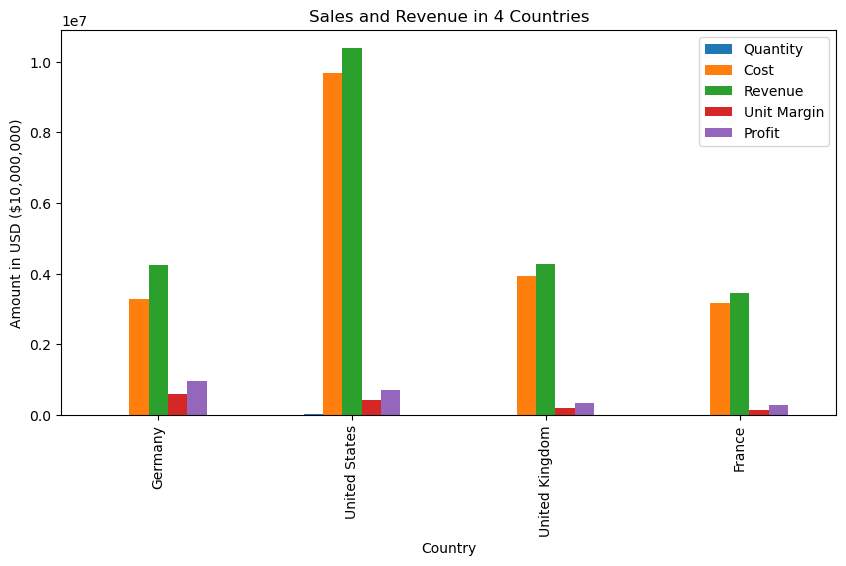

In [16]:
ax = country.plot(kind = 'bar', figsize = (10,5))
ax.set_ylabel('Amount in USD ($10,000,000)')
ax.set_title('Sales and Revenue in 4 Countries')
plt.show()

<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
The graph shows a fascinating insight as the United States seems to be twice the sales and revenue in Germany (and other countries). Still, its profit is significantly less than Germany's. The following section will try to break down the <code>'Profit'</code> in each country to understand what could contribute to product performance in the USA.
    </p>
</div>

### Product Category

**1. How much is the profit/loss of each product IN TOTAL?**

In [17]:
product = df.groupby(['Sub Category'], as_index = False).sum(numeric_only = True)
product = product[['Sub Category', 'Cost', 'Revenue', 'Profit']].set_index('Sub Category').sort_values('Profit')
product

,Cost,Revenue,Profit
Sub Category,,,
Socks,51696.0,61237.0,9541.0
Cleaners,68223.0,82887.0,14664.0
Bike Stands,125610.0,150911.0,25301.0
Bike Racks,105960.0,140854.0,34894.0
Caps,212382.0,255992.0,43610.0
Gloves,182536.0,228353.0,45817.0
Vests,310337.0,368681.0,58344.0
Fenders,257801.0,329204.0,71403.0
Hydration Packs,330935.0,403276.0,72341.0


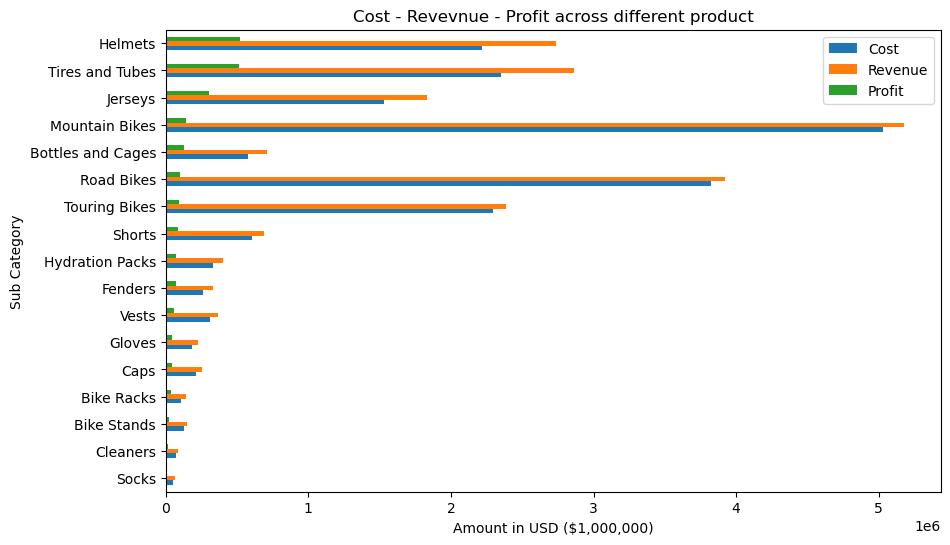

In [18]:
product.plot(kind = 'barh', figsize = (10, 6))
plt.title('Cost - Revevnue - Profit across different product')
plt.xlabel('Amount in USD ($1,000,000)')
plt.show()

**2. How much is the of profit/loss of each product BY COUNTRY?**

In [19]:
product_div = df.groupby(['Country', 'Product Category', 'Sub Category'], as_index = False).sum(numeric_only = True)
product_div = product_div.loc[:, ['Country', 'Product Category', 'Sub Category', 'Quantity', 'Cost', 'Revenue', 'Unit Margin', 'Profit']].sort_values(['Country', 'Product Category', 'Sub Category'])
product_div

,Country,Product Category,Sub Category,Quantity,Cost,Revenue,Unit Margin,Profit
0,France,Accessories,Bike Racks,21.0,9480.0,12456.0,2208.666666,2976.0
1,France,Accessories,Bike Stands,39.0,17649.0,20398.0,1373.833333,2749.0
2,France,Accessories,Bottles and Cages,1362.0,78046.0,93406.0,9618.993345,15360.0
3,France,Accessories,Cleaners,104.0,6261.0,7530.0,808.509998,1269.0
4,France,Accessories,Fenders,127.0,22403.0,27906.0,4020.830002,5503.0
...,...,...,...,...,...,...,...,...
63,United States,Clothing,Gloves,559.0,111600.0,135778.0,15745.293330,24178.0
64,United States,Clothing,Jerseys,2074.0,769588.0,883686.0,68683.190001,114098.0
65,United States,Clothing,Shorts,904.0,485310.0,552740.0,41668.180003,67430.0
66,United States,Clothing,Socks,470.0,32985.0,37975.0,2959.833329,4990.0


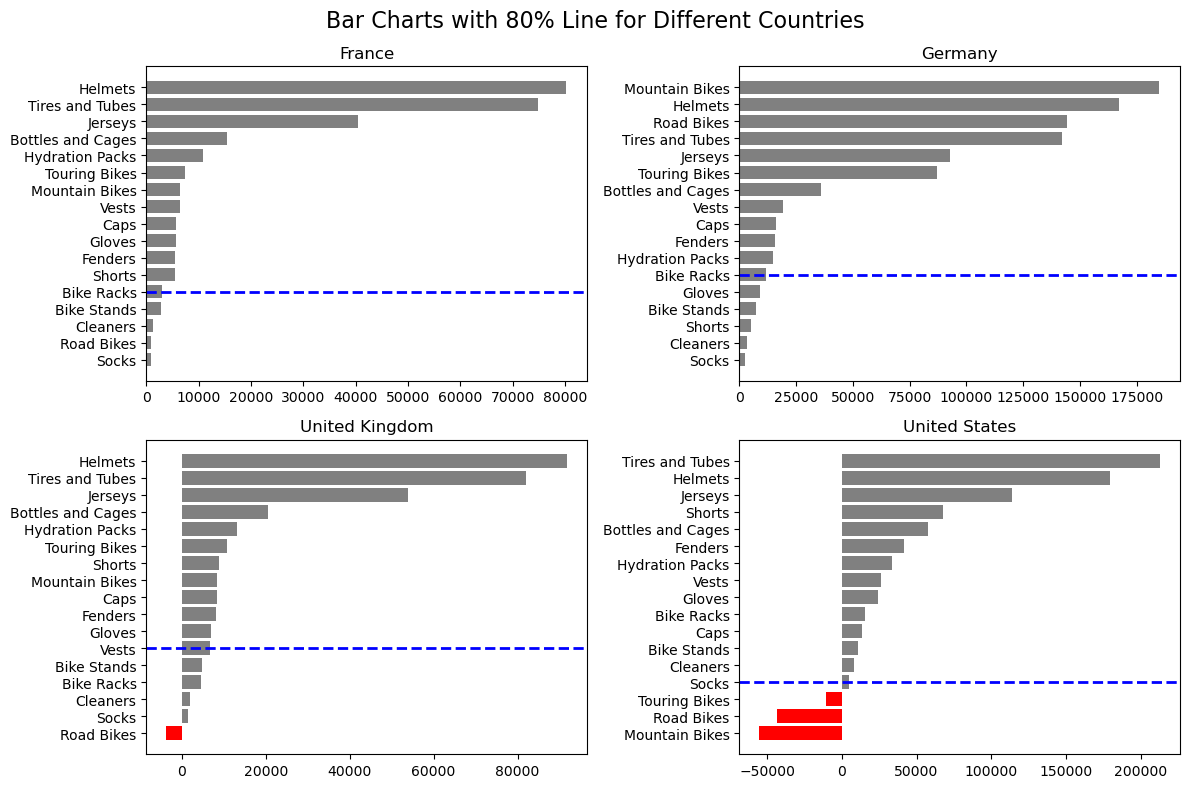

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# List of countries
countries = product_div['Country'].dropna().unique()

# Plot horizontal bar chart and 80% line for each country
for i, country in enumerate(countries):
    country_data = product_div[product_div['Country'] == country].loc[:, ['Sub Category', 'Profit']].sort_values('Profit')
    
    axs[i // 2, i % 2].barh(country_data['Sub Category'], country_data['Profit'], color=country_data['Profit'].apply(lambda x: 'grey' if x >= 0 else 'red'))
    axs[i // 2, i % 2].set_title(country)
    
    product_div_sorted = product_div[product_div['Country'] == country].sort_values('Profit', ascending=False).reset_index()
    product_div_sorted['Cumulative Profit %'] = product_div_sorted['Profit'].cumsum() / product_div_sorted['Profit'].sum()
    axs[i // 2, i % 2].axhline(y=product_div_sorted[product_div_sorted['Cumulative Profit %'] >= 0.8].index[0], color = 'blue', linestyle = '--', linewidth = 2)

# Add title, readjust the position
fig.suptitle('Bar Charts with 80% Line for Different Countries', fontsize=16)
plt.tight_layout()
plt.show()

<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
By breaking down the product further down to country level, we can now notice certain anomalies not shown in the previous analysis. The United States and the United Kingdom are two countries that have a negative profit on "Road Bikes", "Touring Bikes" and "Mountain Bikes".<br><br>
Nevertheless, "Helmets", "Tires and Tubes" and "Jerseys" are by far the most profitable category. While bikes fail to reach a comparable profit as cycling equipment, it leads to an implication that there are some issues with the sales of bicycles.
    </p>
</div>

### Time Series analysis of profit

In [21]:
time = df.groupby(['Country', 'Date'], as_index = False).sum(numeric_only = True).sort_values('Date')
time = time[['Date', 'Country', 'Profit']].set_index('Date')
time

,Country,Profit
Date,,
2015-01-01,France,170.0
2015-01-01,United States,-516.0
2015-01-01,Germany,363.0
2015-01-02,United Kingdom,-242.0
2015-01-02,France,95.0
...,...,...
2016-07-30,United Kingdom,197.0
2016-07-30,United States,1278.0
2016-07-31,United Kingdom,860.0


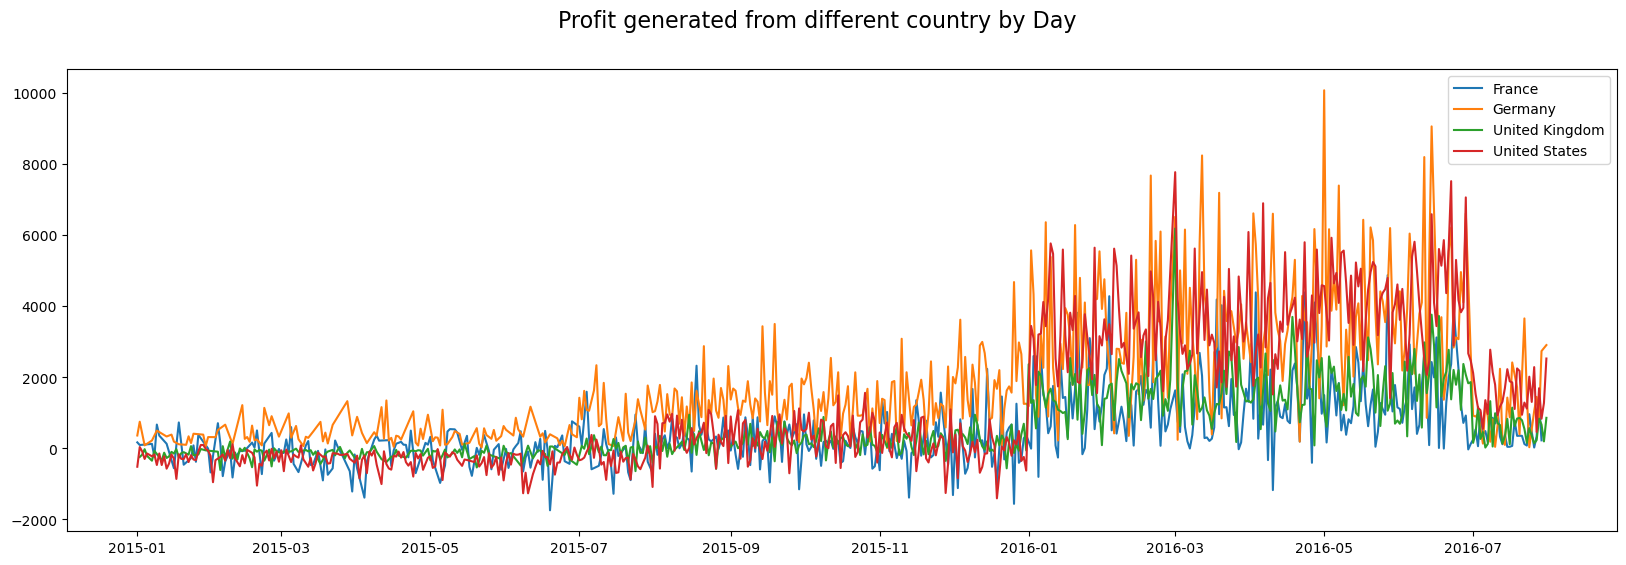

In [22]:
fig, ax = plt.subplots(figsize=(20, 6))

# Group data by 'Country'
grouped_data = time.groupby('Country')

# Iterate through each group and plot the line for each country
for country, group in grouped_data:
    ax.plot(group.index, group['Profit'], label=country)
ax.legend()
fig.suptitle('Profit generated from different country by Day', fontsize = 16)
plt.show()

In [23]:
grouped_data = time.groupby(['Country', time.index.to_period('M')]).sum()
grouped_data

Profit
Country       Date             
France        2015-01     160.0
              2015-02   -1385.0
              2015-03   -5527.0
              2015-04   -1462.0
              2015-05   -1415.0
...                         ...
United States 2016-03  107580.0
              2016-04  108547.0
              2016-05  133392.0
              2016-06  128213.0
              2016-07   47850.0

[76 rows x 1 columns]

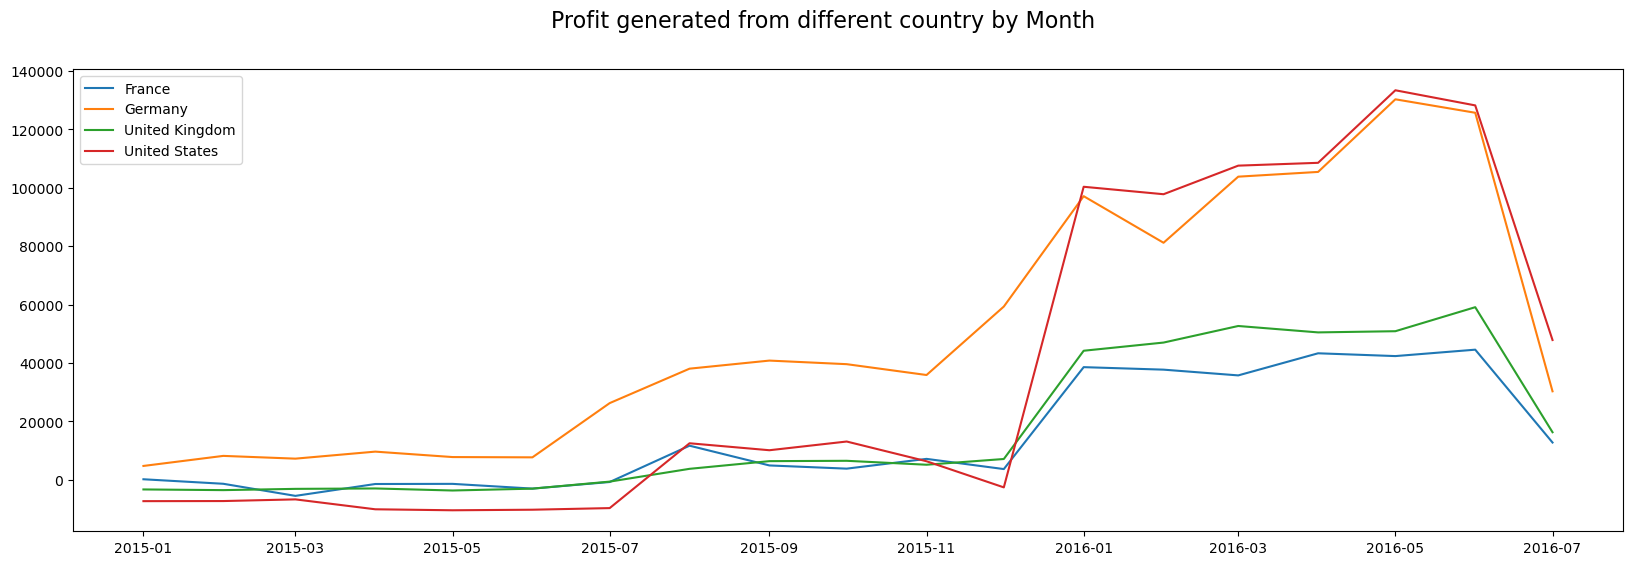

In [24]:
grouped_data = grouped_data.reset_index()
fig, ax = plt.subplots(figsize=(20, 6))

# Turn 'Date' back into a pseudo datetime to create the plot
for country, group in grouped_data.groupby('Country'):
    ax.plot(group['Date'].dt.to_timestamp(), group['Profit'], label=country)
ax.legend()
fig.suptitle('Profit generated from different country by Month', fontsize = 16)
plt.show()

<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
Time-series analysis shows a relatively identical trend across time. From Jan 2016 onward, the business grew remarkably in sales across four countries.
    </p>
</div>

### Demographic

**1. Age**

In [25]:
df[['Country', 'Customer Age']].groupby('Country').mean()

,Customer Age
Country,
France,35.224265
Germany,34.864449
United Kingdom,35.581997
United States,37.435550


**2. Number of Sales**

In [26]:
df[['Country', 'index']].groupby('Country').count()

,index
Country,
France,5168
Germany,5201
United Kingdom,6421
United States,18076


**3. Distribution of Genders**

In [27]:
df[['Country', 'Customer Gender', 'index']].groupby(['Country', 'Customer Gender']).count()

index
Country        Customer Gender       
France         F                 2595
               M                 2573
Germany        F                 2599
               M                 2602
United Kingdom F                 3168
               M                 3253
United States  F                 8699
               M                 9377

<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
Besides the fact that there are more customers in the US market compared to UK/France/Germany, age and gender distribution seem comparable among the countries.
    </p>
</div>

## V. Key Takeaways
***

<div style="background:#F1F0E8;
            display:fill;
            border-radius:5px;
            font-size:105%;
            font-type:Verdana;
            letter-spacing:0.5px;
            padding-top:10px;
            padding-right:10px;
            padding-bottom:0.1px;
            padding-left:10px">
    <p style="color:#2F4858">
    <ul>
        <li>Germany has the best pricing strategy resulted in higher profits.</li>
        <li>Bike products yield loss in the United States and the United Kingdom. The product line should be reconsidered to find the root causes (price/branding/segment/...).</li>
    </ul>
    </p>
</div>